In [78]:
import warnings
warnings.filterwarnings('ignore')

In [79]:
import pandas as pd

# Load the dataset from the local directory
df = pd.read_csv('/kaggle/input/twitter-sentiment/twitter_sentiment.csv', header=None, index_col=[0])

# Select relevant columns and reset index
df = df[[2, 3]].reset_index(drop=True)

# Rename columns
df.columns = ['sentiment', 'text']

# Display the first few rows of the dataframe
df.head()


,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [80]:
df.info()

df.isnull().sum()

df.dropna(inplace=True)

df = df[df['text'].apply(len)>1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [81]:
df['sentiment'].value_counts()

sentiment
Negative      22530
Positive      20844
Neutral       18285
Irrelevant    12988
Name: count, dtype: int64

In [82]:


def get_basic_features(df, text_column):
    # Ensure text column is converted to string
    df[text_column] = df[text_column].astype(str)
    
    # Basic Text Features
    df['char_count'] = df[text_column].apply(len)  # Number of characters
    df['word_count'] = df[text_column].apply(lambda x: len(x.split()))  # Number of words
    df['sentence_count'] = df[text_column].apply(lambda x: x.count('.'))  # Number of sentences
    df['avg_word_length'] = df['char_count'] / (df['word_count'] + 1e-6)  # Average word length
    df['avg_sentence_length'] = df['word_count'] / (df['sentence_count'] + 1e-6)  # Average sentence length
    
    # Count of specific characters
    df['num_digits'] = df[text_column].apply(lambda x: sum(c.isdigit() for c in x))  # Number of digits
    df['num_uppercase'] = df[text_column].apply(lambda x: sum(c.isupper() for c in x))  # Number of uppercase letters
    df['num_lowercase'] = df[text_column].apply(lambda x: sum(c.islower() for c in x))  # Number of lowercase letters
    df['num_special_chars'] = df[text_column].apply(lambda x: sum(not c.isalnum() for c in x))  # Special characters

    # Flag for empty or short text
    df['is_empty'] = df[text_column].apply(lambda x: 1 if len(x.strip()) == 0 else 0)
    df['is_short'] = df[text_column].apply(lambda x: 1 if len(x) < 5 else 0)
    
    return df

# Example usage
# Assuming `df` is your DataFrame and 'text_column' is the name of the text column you want to analyze
text_column = 'text'  # Replace with the actual column name
df = get_basic_features(df, text_column)

# Display the updated DataFrame
print(df.head())


  sentiment                                               text  char_count  \
0  Positive  im getting on borderlands and i will murder yo...          53   
1  Positive  I am coming to the borders and I will kill you...          51   
2  Positive  im getting on borderlands and i will kill you ...          50   
3  Positive  im coming on borderlands and i will murder you...          51   
4  Positive  im getting on borderlands 2 and i will murder ...          57   

   word_count  sentence_count  avg_word_length  avg_sentence_length  \
0          11               0         4.818181           11000000.0   
1          12               0         4.250000           12000000.0   
2          10               0         5.000000           10000000.0   
3          10               0         5.099999           10000000.0   
4          12               0         4.750000           12000000.0   

   num_digits  num_uppercase  num_lowercase  num_special_chars  is_empty  \
0           0              0

In [83]:
df.columns


Index(['sentiment', 'text', 'char_count', 'word_count', 'sentence_count',
       'avg_word_length', 'avg_sentence_length', 'num_digits', 'num_uppercase',
       'num_lowercase', 'num_special_chars', 'is_empty', 'is_short'],
      dtype='object')

In [84]:
df.head()

,sentiment,text,char_count,word_count,sentence_count,avg_word_length,avg_sentence_length,num_digits,num_uppercase,num_lowercase,num_special_chars,is_empty,is_short
0,Positive,im getting on borderlands and i will murder yo...,53,11,0,4.818181,11000000.0,0,0,42,11,0,0
1,Positive,I am coming to the borders and I will kill you...,51,12,0,4.250000,12000000.0,0,2,37,12,0,0
2,Positive,im getting on borderlands and i will kill you ...,50,10,0,5.000000,10000000.0,0,0,40,10,0,0
3,Positive,im coming on borderlands and i will murder you...,51,10,0,5.099999,10000000.0,0,0,41,10,0,0
4,Positive,im getting on borderlands 2 and i will murder ...,57,12,0,4.750000,12000000.0,1,0,44,12,0,0


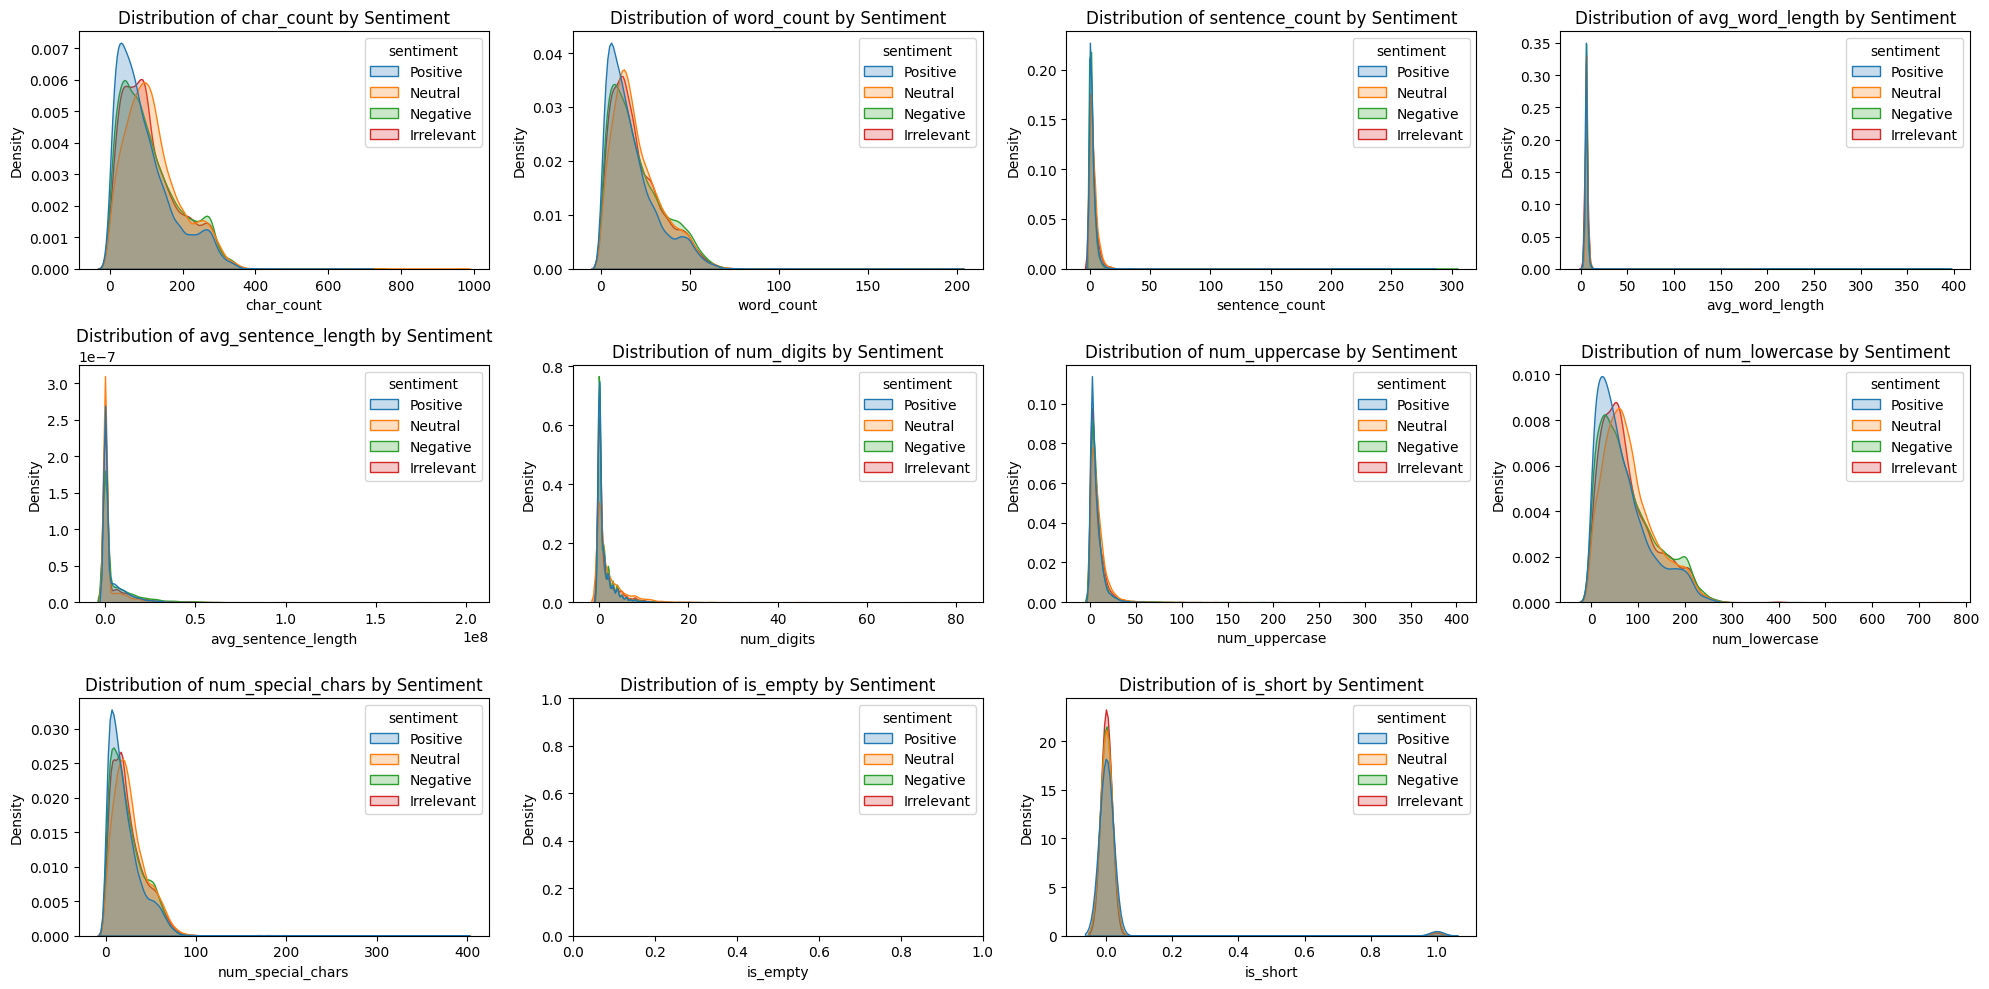

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(20, 10))

# Select numerical columns
num_cols = df.select_dtypes(include='number').columns

# Determine number of rows and columns
rows, cols = 3, 4  # You can adjust the rows and columns

# Plot KDE plots for each numerical feature
for idx, col in enumerate(num_cols):
    plt.subplot(rows, cols, idx + 1)  # Adjust the subplot grid dimensions
    sns.kdeplot(data=df, x=col, hue='sentiment', fill=True, common_norm=False)
    plt.title(f'Distribution of {col} by Sentiment')

plt.tight_layout()  # Adjust spacing between plots
plt.show()


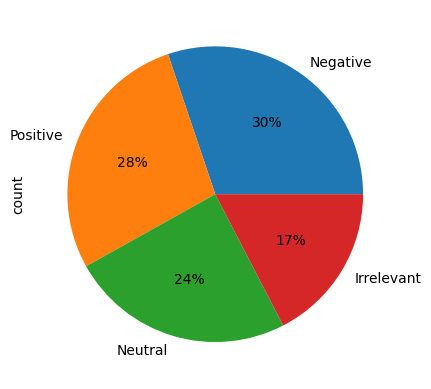

In [86]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# word cloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

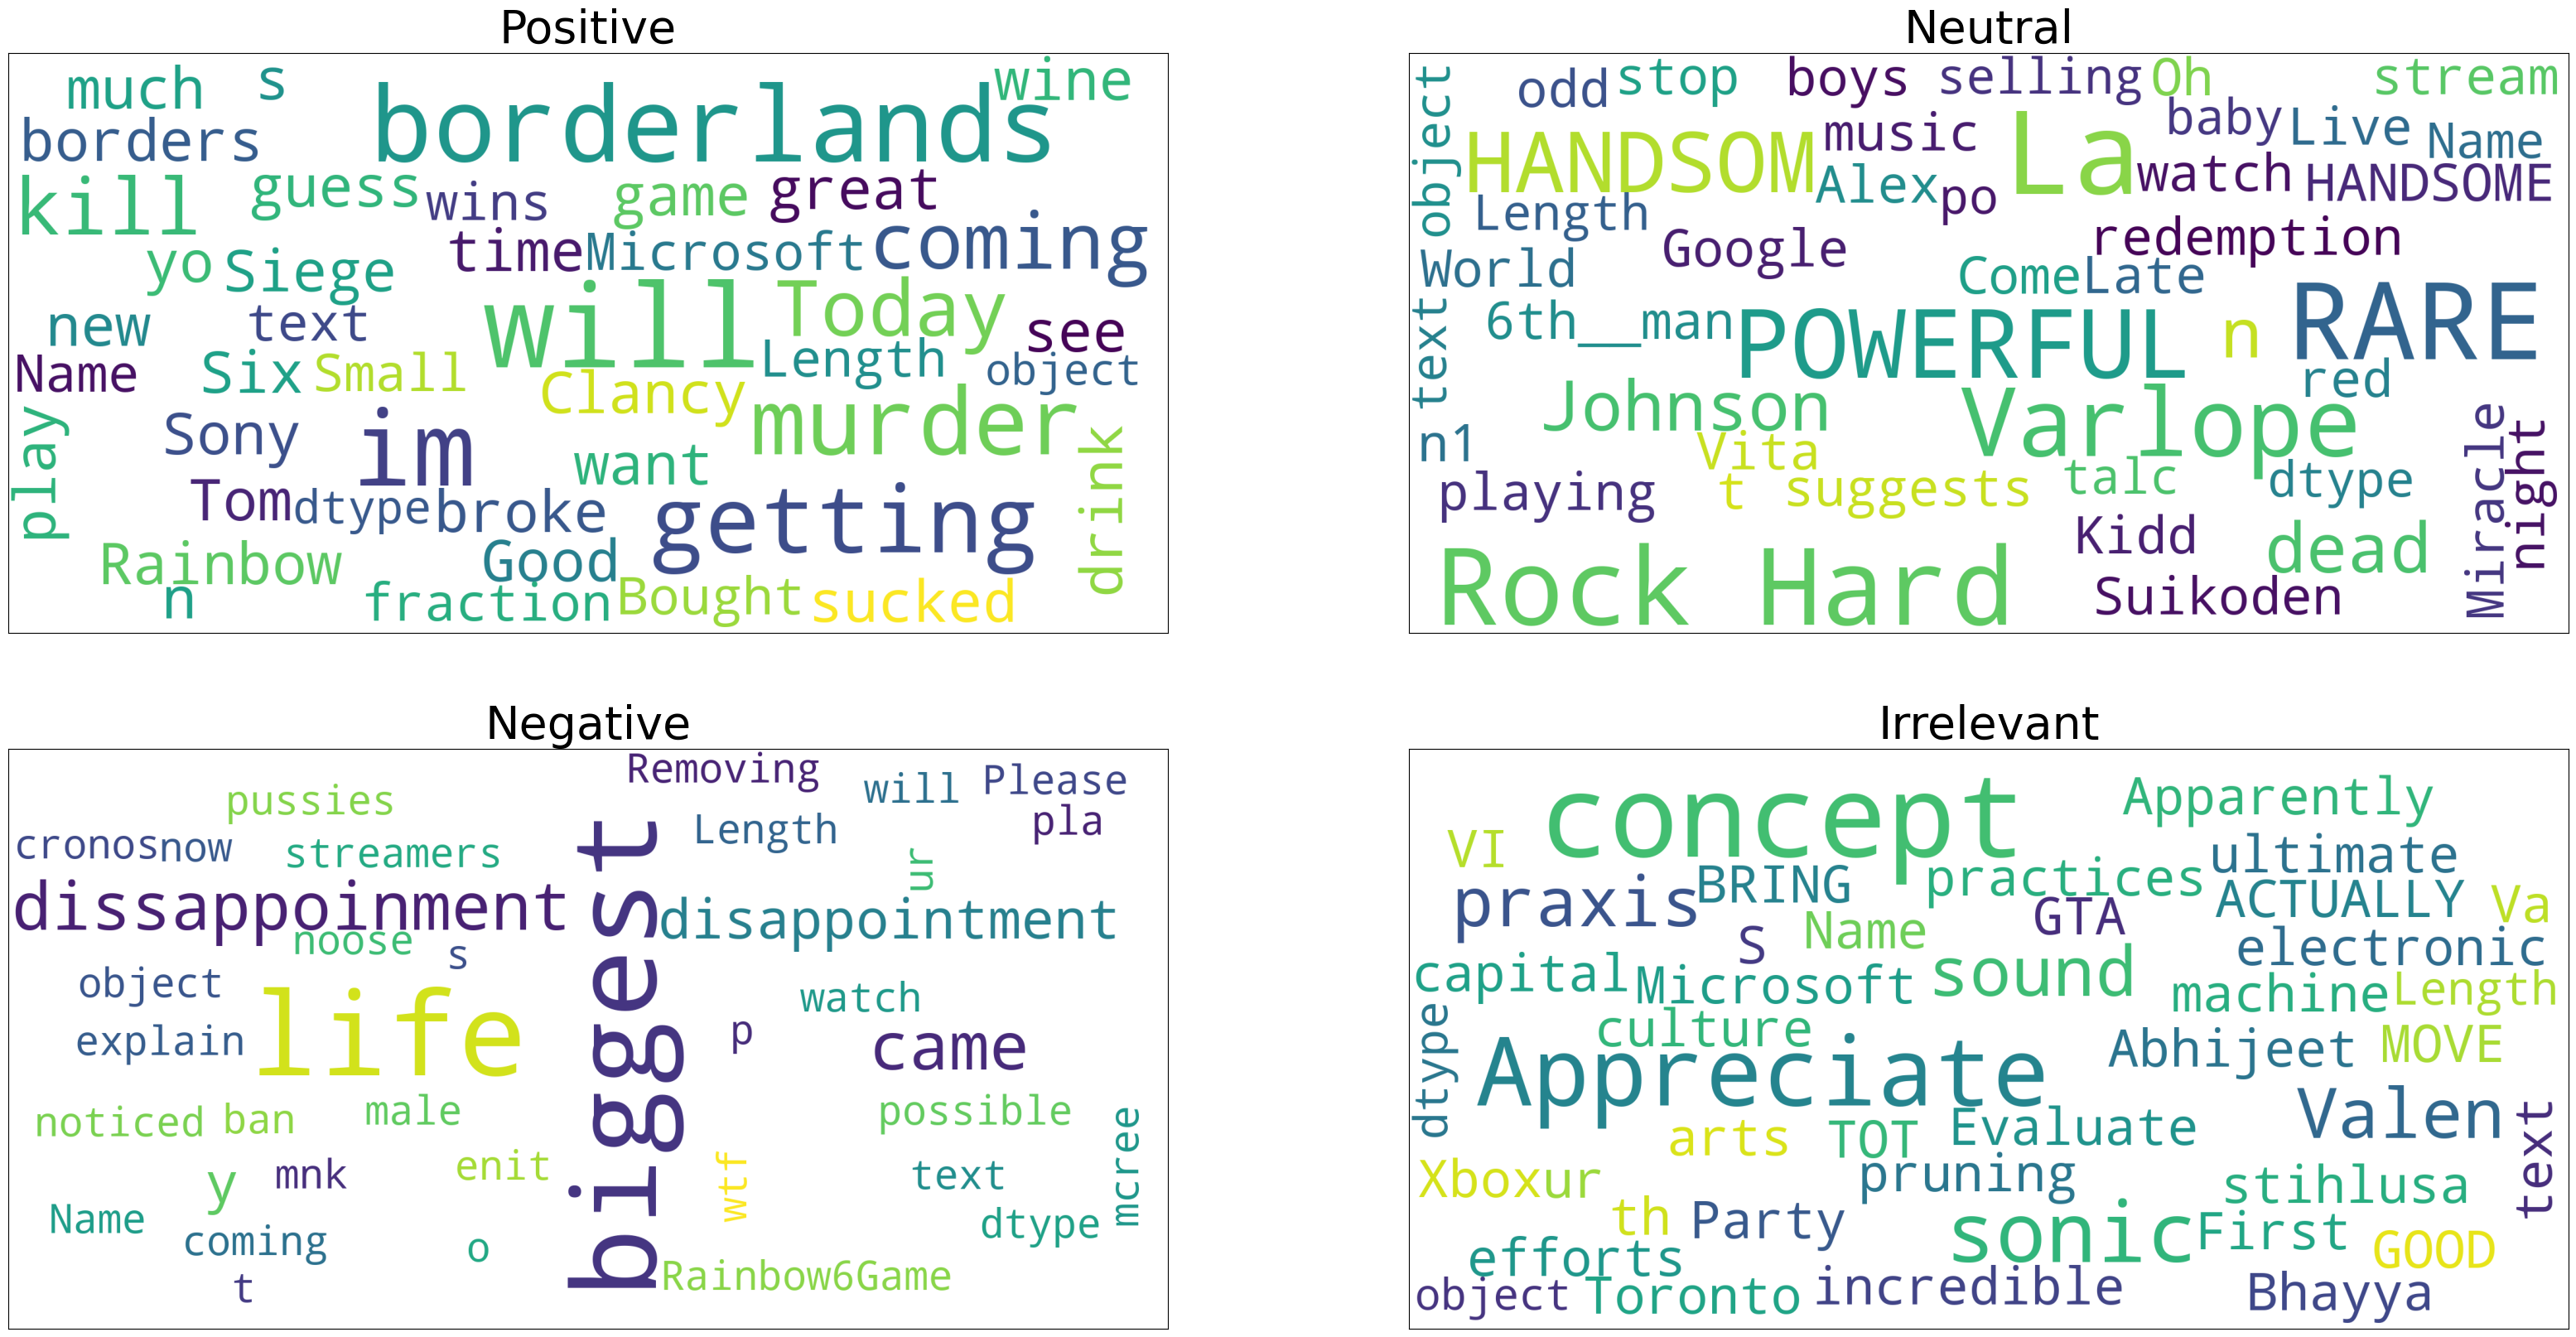

<Figure size 640x480 with 0 Axes>

In [87]:
# plot 2x2 grid word cloud for each sentiment
plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = df[df['sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)
    
plt.show()
plt.tight_layout()


In [88]:
import re

def remove_urls(text):
    return re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

def remove_special_chars(text):
    return re.sub(r'[^A-Za-z0-9\s]+', '', text)

def remove_rt(text):
    return re.sub(r'^rt[\s]+', '', text, flags=re.IGNORECASE)

df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(remove_urls)  # Applying the function
df['text'] = df['text'].apply(remove_html_tags)
df['text'] = df['text'].apply(remove_special_chars)
df['text'] = df['text'].apply(remove_rt)



In [89]:
df.columns


Index(['sentiment', 'text', 'char_count', 'word_count', 'sentence_count',
       'avg_word_length', 'avg_sentence_length', 'num_digits', 'num_uppercase',
       'num_lowercase', 'num_special_chars', 'is_empty', 'is_short'],
      dtype='object')

In [90]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

In [91]:
X_train.shape, X_test.shape

((59717,), (14930,))

In [94]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')

# Load dataset
# Ensure your dataset has 'text' and 'label' columns
try:
    df = pd.read_csv('/kaggle/input/twitter-sentiment/twitter_sentiment.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: Dataset file not found. Please check the file path.")

# Display basic dataset information
print("Dataset overview:")
print(df.info())
print(df.head())

# Check for missing values
if df.isnull().sum().any():
    print("Missing values detected. Filling missing values with empty strings.")
    df.fillna('', inplace=True)

# Data preprocessing
print("Starting text preprocessing...")
df['im getting on borderlands and i will murder you all ,'] = df['im getting on borderlands and i will murder you all ,'].str.lower()  # Convert to lowercase
df['im getting on borderlands and i will murder you all ,'] = df['im getting on borderlands and i will murder you all ,'].str.replace(r'http\S+', '', regex=True)  # Remove URLs
df['im getting on borderlands and i will murder you all ,'] = df['im getting on borderlands and i will murder you all ,'].str.replace(r'<.*?>', '', regex=True)    # Remove HTML tags
df['im getting on borderlands and i will murder you all ,'] = df['im getting on borderlands and i will murder you all ,'].str.replace(r'[^a-zA-Z\s]', '', regex=True)  # Remove special characters and numbers
df['im getting on borderlands and i will murder you all ,'] = df['im getting on borderlands and i will murder you all ,'].str.strip()  # Remove leading/trailing whitespace

# Define stopwords
stopwords_list = stopwords.words('english')

# Split the data into training and testing sets
print("Splitting the data...")
X_train, X_test, y_train, y_test = train_test_split(
    df['im getting on borderlands and i will murder you all ,'], df['Positive'], test_size=0.2, random_state=42
)

# Build the model pipeline
print("Building the model pipeline...")
clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords_list, max_features=5000)),  # Limit to 5000 features for efficiency
    ('clf', RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42))  # RandomForest Classifier
])

# Train the model
print("Training the model...")
clf.fit(X_train, y_train)

# Evaluate the model
print("Evaluating the model...")
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Save the model for reuse
import joblib
joblib.dump(clf, 'sentiment_analysis_model.pkl')
print("Model saved as 'sentiment_analysis_model.pkl'")


[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
Dataset loaded successfully!
Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75681 entries, 0 to 75680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   75681 non-null  int64 
 1   Borderlands                                            75681 non-null  object
 2   Positive                                               75681 non-null  object
 3   im getting on borderlands and i will murder you all ,  74995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  24

Here's a concise explanation:

---

### **Code Workflow**

1. **Imports**:  
   Libraries for text preprocessing, vectorization, classification, and evaluation are imported (`pandas`, `nltk`, `scikit-learn`).

2. **Stopword Initialization**:  
   Download NLTK stopwords and define `stopwords` for text cleaning.

3. **Data Loading**:  
   Load a dataset (e.g., CSV file) containing text data and labels.

4. **Data Preprocessing**:  
   - Convert text to lowercase.  
   - Remove unwanted elements (URLs, HTML tags, special characters) using custom preprocessing functions.

5. **Train-Test Split**:  
   Split the dataset into training (`X_train`, `y_train`) and testing sets (`X_test`, `y_test`).

6. **Model Pipeline**:  
   - Use `TfidfVectorizer` for text vectorization (stopwords removed).  
   - Apply `RandomForestClassifier` for classification.  
   - Combine these in a `Pipeline`.

7. **Model Training**:  
   Fit the pipeline to the training data.

8. **Evaluation**:  
   - Predict labels on the test set.  
   - Compute and print the `accuracy_score`.

---

This approach combines preprocessing, feature extraction, and model building into an efficient, automated workflow.

In [96]:
import pandas as pd
import joblib
from ipywidgets import widgets, Output, interactive
from IPython.display import display

# Load the saved model
model = joblib.load('sentiment_analysis_model.pkl')

# Function to predict sentiment
def predict_sentiment(text):
    prediction = model.predict([text])
    return f"Prediction: {prediction[0]}"

# Input box and button for user interaction
text_input = widgets.Text(
    value='', 
    placeholder='Enter text to analyze...', 
    description='Text:',
    layout=widgets.Layout(width='50%')
)

output = Output()

def on_submit(change):
    with output:
        output.clear_output()  # Clear previous output
        print(predict_sentiment(change.new))

text_input.observe(on_submit, names='value')  # Observe the input field

# Display the input box and output
display(text_input, output)


Text(value='', description='Text:', layout=Layout(width='50%'), placeholder='Enter text to analyze...')

Output()